In [ ]:
!pip install pyreadr

# imports

In [2]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
comp_light = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/compustat_all_light.rds")[None]
    .assign(
        datadate=lambda x: pd.to_datetime(x.datadate, format="%Y-%m-%d"),
        fdate = lambda x: pd.to_datetime(x.fdate, format="%Y-%m-%d"),
        WCTA = lambda df: df["wcap"] / df["at"],
        RETA = lambda df: df["re"] / df["at"],
        EBTA = lambda df: df["ebit"] / df["at"],
        TLTA = lambda df: df["lt"] / df["at"],
        SLTA = lambda df: df["sale"] / df["at"],
    )
)
crsp_daily = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/crsp_daily_light.rds")[None]
    .assign(
        date=lambda x: pd.to_datetime(x.date, format="%Y-%m-%d"),
        linkdt=lambda x: pd.to_datetime(x.linkdt, format="%Y-%m-%d"),
        linkenddt=lambda x: pd.to_datetime(x.linkenddt, format="%Y-%m-%d")
    )
)



company_variable = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/compustat_company_variables.rds")[None]
    .query('variable_postgres in ("dldte","dlrsn")')
)

inact_df = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/inact_all.rds")[None]
)

ccmxpf_linktable = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/ccmxpf_linktable.rds")[None]
)

In [5]:
company_all = (
    pyreadr.read_r("/Users/hugorameil/Documents/GitHub/scoring_project/wrds_data/company_all.rds")[None]
    .assign(
        dldte = lambda x: pd.to_datetime(x.dldte, format="%Y-%m-%d"),
    )
    .query('conm in ("APPLE INC","ENRON CORP","EASTMAN KODAK CO")')
    .filter(["conm","gvkey","dlrsn","dldte","fyrc"])
)

# merging crsp and compustat data

In [119]:
comp_light

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,au,auop,auopic,ceoso,cfoso,WCTA,RETA,EBTA,TLTA,SLTA
0,001690,1980-09-30,1980,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,2,1,NaN,NaN,NaN,0.249824,0.222188,0.360918,0.602923,1.792288
1,001690,1981-09-30,1981,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,2,1,NaN,NaN,NaN,0.615387,0.212174,0.259549,0.303922,1.313709
2,001690,1982-09-30,1982,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,2,1,NaN,NaN,NaN,0.646527,0.324277,0.285670,0.281438,1.629632
3,001690,1983-09-30,1983,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,2,1,NaN,NaN,NaN,0.611247,0.348892,0.232921,0.321029,1.765731
4,001690,1984-09-30,1984,INDL,C,D,STD,AAPL,037833100,APPLE INC,...,2,1,NaN,NaN,NaN,0.548142,0.324064,0.115935,0.411038,1.921784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,177827,2010-12-31,2010,INDL,C,D,STD,FIATY1,17193Z004,CHRYSLER GROUP LLC,...,5,1,0,N,N,-0.113769,-0.166098,0.024063,1.126633,1.183277
473,177827,2011-12-31,2011,INDL,C,D,STD,FIATY1,17193Z004,CHRYSLER GROUP LLC,...,5,1,0,Y,Y,-0.031990,-0.231521,0.057401,1.160749,1.464481
474,177827,2012-12-31,2012,INDL,C,D,STD,FIATY1,17193Z004,CHRYSLER GROUP LLC,...,5,1,0,Y,Y,-0.016866,-0.241781,0.071563,1.177174,1.605623
475,177827,2013-12-31,2013,INDL,C,D,STD,FIATY1,17193Z004,CHRYSLER GROUP LLC,...,4,1,0,Y,Y,0.004971,-0.084478,0.071158,1.027077,1.574014


In [27]:
acc = (
    comp_light
    .query('conm in ("APPLE INC","ENRON CORP","EASTMAN KODAK CO")')
    .filter(['gvkey','fyear','fdate','conm','WCTA','RETA','EBTA','TLTA','SLTA'])
    .assign(fyear = lambda df : pd.to_datetime(df['fyear'], format='%Y').dt.year)
)
acc.head()

,gvkey,fyear,fdate,conm,WCTA,RETA,EBTA,TLTA,SLTA
0,001690,1980,NaT,APPLE INC,0.249824,0.222188,0.360918,0.602923,1.792288
1,001690,1981,NaT,APPLE INC,0.615387,0.212174,0.259549,0.303922,1.313709
2,001690,1982,NaT,APPLE INC,0.646527,0.324277,0.285670,0.281438,1.629632
3,001690,1983,NaT,APPLE INC,0.611247,0.348892,0.232921,0.321029,1.765731
4,001690,1984,NaT,APPLE INC,0.548142,0.324064,0.115935,0.411038,1.921784


In [7]:
subset_mapping = (ccmxpf_linktable
 .query(f'gvkey in {acc.gvkey.unique().tolist()}')
 .merge(
    company_all.filter(['gvkey','conm']),
    how='left',
    on='gvkey'
 )
 )
subset_mapping

,permno,gvkey,linkdt,linkenddt,conm
0,14593.0,001690,1980-12-12,2024-10-12,APPLE INC
1,11754.0,004194,1950-01-01,1962-01-30,EASTMAN KODAK CO
2,11754.0,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO
3,14276.0,004194,2013-11-01,2024-10-12,EASTMAN KODAK CO
4,23317.0,006127,1962-01-01,1962-01-30,ENRON CORP
5,23317.0,006127,1962-01-31,2002-01-11,ENRON CORP


In [8]:
# Selecting specific columns from crsp_daily
crsp_daily_selected = crsp_daily[['cusip', 'permno', 'date', 'prc', 'vol', 'shrout', 'bid', 'ask']]

# Merging with subset_mapping using a left join on 'permno'
merged_df = crsp_daily_selected.merge(subset_mapping, on='permno', how='left', indicator=True)

# Filtering rows where 'gvkey' is not null and 'date' is between 'linkdt' and 'linkenddt'
merged_crsp_compustat_sub = merged_df[
    (merged_df['gvkey'].notna()) & (merged_df['date'] >= merged_df['linkdt']) & (merged_df['date'] <= merged_df['linkenddt'])
]

In [9]:
merged_crsp_compustat_sub.head()

,cusip,permno,date,prc,vol,shrout,bid,ask,gvkey,linkdt,linkenddt,conm,_merge
1484,27746110,11754.0,1992-12-28,40.375,415500.0,325036,40.250,40.375,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO,both
1486,27746110,11754.0,1992-12-29,40.375,668600.0,325036,40.250,40.500,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO,both
1488,27746110,11754.0,1992-12-30,40.375,703000.0,325036,40.250,40.500,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO,both
1490,27746110,11754.0,1992-12-31,40.500,529700.0,325215,40.625,40.750,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO,both
1492,27746110,11754.0,1993-01-04,40.875,1238100.0,325215,40.875,41.000,004194,1962-01-31,2012-01-18,EASTMAN KODAK CO,both


# plot

/var/folders/bb/0fyj2sys4dd63npmxgrc8dz40000gn/T/ipykernel_20258/2090961387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_crsp_compustat_sub['market_cap'] = merged_crsp_compustat_sub['prc'] * merged_crsp_compustat_sub['shrout'] * 1000


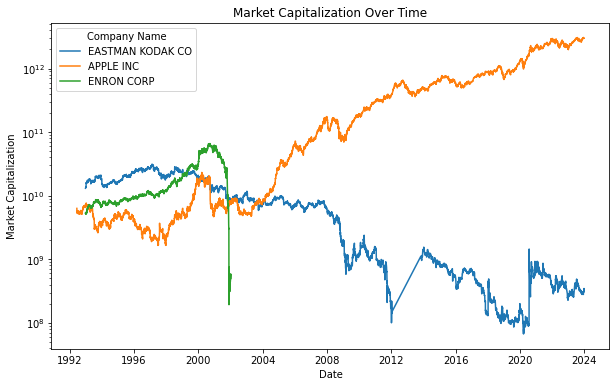

In [10]:
# Calculate market capitalization
merged_crsp_compustat_sub['market_cap'] = merged_crsp_compustat_sub['prc'] * merged_crsp_compustat_sub['shrout'] * 1000

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_crsp_compustat_sub, x='date', y='market_cap', hue='conm')

# Log scale for y-axis
plt.yscale('log')
#plt.gca().yaxis.set_major_formatter(FuncFormatter(short_scale_formatter))
plt.xlabel('Date')
plt.ylabel('Market Capitalization')
plt.title('Market Capitalization Over Time')
plt.legend(title='Company Name')
plt.show()

# default data (bankcuptcy)

In [13]:
lopucki = (
    pd.read_excel('/Users/hugorameil/Documents/GitHub/scoring_project/default_data/Bankruptcy - LoPucki/Florida-UCLA-LoPucki Bankruptcy Research Database 1-12-2023.xlsx')
    .assign(GvkeyBefore=lambda x: x['GvkeyBefore'].astype(str),
            DateFiled = lambda x: pd.to_datetime(x['DateFiled']),
            YearFiled = lambda x: x['DateFiled'].dt.year)
    #.groupby('GvkeyBefore')
    #.filter(lambda x: len(x) > 1)
    .filter(['NameCorp', 'Chapter', 'GvkeyBefore', 'DateFiled', 'YearFiled'])
)
lopucki

,NameCorp,Chapter,GvkeyBefore,DateFiled,YearFiled
0,1st Centennial Bancorp,7,65467,2009-03-25,2009
1,"21st Century Oncology Holdings, Inc.",11,265008,2017-05-25,2017
2,"A. H. Robins Company, Inc.",11,9183,1985-08-21,1985
3,A. M. Castle & Co.,11,2811,2017-06-18,2017
4,"A123 Systems, Inc.",11,180636,2012-10-16,2012
...,...,...,...,...,...
1213,York Research Corporation (2002),11,11656,2001-12-20,2001
1214,"Young Broadcasting, Inc.",11,30950,2009-02-13,2009
1215,Zale Corp.,11,11669,1992-01-01,1992
1216,Zenith Electronics Corp.,11,11678,1999-08-23,1999


In [14]:
lopucki_clean = (
    lopucki
    .query("Chapter in ['7', '11']")
    .assign(DateFiled=lambda x: pd.to_datetime(x.DateFiled, format='%m/%d/%Y'),
            GvkeyBefore=lambda x: x.GvkeyBefore.astype(int)
            )
    .sort_values(by=['GvkeyBefore', 'DateFiled'])
    .groupby('GvkeyBefore', as_index=False)
    .agg(
        DateFiled=('DateFiled', 'min'),
        YearFiled=('YearFiled', 'min'),
        NameCorp=('NameCorp', 'first'),
        Chapter=('Chapter', 'first')
    )
)
lopucki_clean

,GvkeyBefore,DateFiled,YearFiled,NameCorp,Chapter
0,1043,1982-04-14,1982,"AM International, Inc. (1982)",11
1,1045,2011-11-29,2011,AMR Corporation,11
2,1094,2019-02-19,2019,Aceto Corporation,11
3,1193,2002-10-01,2002,Agway Inc.,11
4,1204,1984-07-03,1984,Air Florida System Inc.,11
...,...,...,...,...,...
1066,272838,2021-03-09,2021,Sundance Energy Inc.,11
1067,282189,2016-04-14,2016,Energy XXI Ltd,11
1068,285536,2014-03-20,2014,MModal Inc.,11
1069,297209,2020-10-30,2020,Pacific Drilling S.A. (2020),11


On a dans lopucki_clean tous les defaut d'entreprises (en supprimant les doublons sur les gvkeybefore)

# modifications on compustat data

- fyear -> annee_reference
- annee_publication = fyear + 1 (on dit que les données de comptes sont publiées l'année d'après)
- change gvkey en int

In [118]:
acc

,gvkey,fyear,fdate,conm,WCTA,RETA,EBTA,TLTA,SLTA
0,001690,1980,NaT,APPLE INC,0.249824,0.222188,0.360918,0.602923,1.792288
1,001690,1981,NaT,APPLE INC,0.615387,0.212174,0.259549,0.303922,1.313709
2,001690,1982,NaT,APPLE INC,0.646527,0.324277,0.285670,0.281438,1.629632
3,001690,1983,NaT,APPLE INC,0.611247,0.348892,0.232921,0.321029,1.765731
4,001690,1984,NaT,APPLE INC,0.548142,0.324064,0.115935,0.411038,1.921784
...,...,...,...,...,...,...,...,...,...
268,006127,1996,NaT,ENRON CORP,0.016794,0.116502,0.042759,0.685815,0.823511
269,006127,1997,NaT,ENRON CORP,0.010973,0.065281,0.033729,0.668773,0.865554
270,006127,1998,NaT,ENRON CORP,-0.005928,0.067939,0.049029,0.652743,1.065077
271,006127,1999,NaT,ENRON CORP,0.014859,0.055481,0.037237,0.610557,1.201642


In [29]:
acc_modified = (
    acc
    .assign(annee_publication = lambda df : df['fyear'] + 1,
            annee_reference = lambda df: df.fyear,
            gvkey = lambda df : df.gvkey.astype(int))
    .drop(["fdate"], axis=1)
)
acc_modified

,gvkey,fyear,conm,WCTA,RETA,EBTA,TLTA,SLTA,annee_publication,annee_reference
0,1690,1980,APPLE INC,0.249824,0.222188,0.360918,0.602923,1.792288,1981,1980
1,1690,1981,APPLE INC,0.615387,0.212174,0.259549,0.303922,1.313709,1982,1981
2,1690,1982,APPLE INC,0.646527,0.324277,0.285670,0.281438,1.629632,1983,1982
3,1690,1983,APPLE INC,0.611247,0.348892,0.232921,0.321029,1.765731,1984,1983
4,1690,1984,APPLE INC,0.548142,0.324064,0.115935,0.411038,1.921784,1985,1984
...,...,...,...,...,...,...,...,...,...,...
268,6127,1996,ENRON CORP,0.016794,0.116502,0.042759,0.685815,0.823511,1997,1996
269,6127,1997,ENRON CORP,0.010973,0.065281,0.033729,0.668773,0.865554,1998,1997
270,6127,1998,ENRON CORP,-0.005928,0.067939,0.049029,0.652743,1.065077,1999,1998
271,6127,1999,ENRON CORP,0.014859,0.055481,0.037237,0.610557,1.201642,2000,1999


# merge (compustat <-> lopucki)

### Comment définir la variable default ?

- 1 si : l'année de dépot du dossier n'est pas vide ET si l'année de publication des comptes est la même que l'année de dépot du dossier
- 0 sinon

In [35]:
dataset = (
    acc_modified
    .merge(lopucki_clean[['GvkeyBefore','DateFiled','YearFiled']],
           left_on='gvkey', 
           right_on='GvkeyBefore', 
           how='left')
    .assign(
       default = lambda df : np.where((df['YearFiled'].notna()) & (df['annee_publication'] == df['YearFiled']),1,0)
       )
)

dataset

,gvkey,fyear,conm,WCTA,RETA,EBTA,TLTA,SLTA,annee_publication,annee_reference,GvkeyBefore,DateFiled,YearFiled,default
0,1690,1980,APPLE INC,0.249824,0.222188,0.360918,0.602923,1.792288,1981,1980,NaN,NaT,NaN,0
1,1690,1981,APPLE INC,0.615387,0.212174,0.259549,0.303922,1.313709,1982,1981,NaN,NaT,NaN,0
2,1690,1982,APPLE INC,0.646527,0.324277,0.285670,0.281438,1.629632,1983,1982,NaN,NaT,NaN,0
3,1690,1983,APPLE INC,0.611247,0.348892,0.232921,0.321029,1.765731,1984,1983,NaN,NaT,NaN,0
4,1690,1984,APPLE INC,0.548142,0.324064,0.115935,0.411038,1.921784,1985,1984,NaN,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,6127,1996,ENRON CORP,0.016794,0.116502,0.042759,0.685815,0.823511,1997,1996,6127.0,2001-12-02,2001.0,0
143,6127,1997,ENRON CORP,0.010973,0.065281,0.033729,0.668773,0.865554,1998,1997,6127.0,2001-12-02,2001.0,0
144,6127,1998,ENRON CORP,-0.005928,0.067939,0.049029,0.652743,1.065077,1999,1998,6127.0,2001-12-02,2001.0,0
145,6127,1999,ENRON CORP,0.014859,0.055481,0.037237,0.610557,1.201642,2000,1999,6127.0,2001-12-02,2001.0,0


remarque : 
- date_publication.min() = 1981 
- date_publication.max() = 2024  

# Pipeline d'entrainement

Fonctions pour l'entrainement : 

- clean_dataset : garder que les colonnes utiles
- preprocess_training_test : garder les données sur une bonne période de temps
- train_model : entrainer le modèle
- get_prediction : predict Y for rows in test_dataset

- get_summary_statistics : get summary statistics for datasets

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score

In [104]:
def log_loss(y_true, y_pred):
    return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [109]:
def clean_dataset(df, variables_to_keep : list) -> pd.DataFrame:
    ''' brutforce avec le dropna ici !!!!!!!!!!!!'''
    return df.filter(variables_to_keep).dropna()

def preprocess_training_test(df, start_date_training, end_date_training, end_date_test) -> pd.DataFrame:
    df_train = df.query(f"annee_publication >= {start_date_training} & annee_publication <= {end_date_training}")
    df_test = df.query(f"annee_publication > {end_date_training} & annee_publication <= {end_date_test}")
    return df_train, df_test

def train_model(df_train, target_variable) :
    X = df_train.drop(target_variable, axis=1)
    y = df_train[target_variable]
    
    model = LogisticRegression()
    model.fit(X, y)
    
    return model

def get_prediction(df_test, target_variable, model) :
    return model.predict_proba(df_test.drop(target_variable, axis=1))[:, 1]

####### evaluation
def evaluation(df_test, target_variable, prediction) :
    logloss = log_loss(df_test[target_variable], prediction)
    return {"Log Loss": logloss}

###### summary statistics
def get_summary_statistics(df):
    return df.info(), df.describe()

# test

In [95]:
variables_to_keep = ['annee_publication','WCTA','RETA','EBTA','TLTA','SLTA','default']

In [117]:
df = clean_dataset(dataset, variables_to_keep)
df

,annee_publication,WCTA,RETA,EBTA,TLTA,SLTA,default
0,1981,0.249824,0.222188,0.360918,0.602923,1.792288,0
1,1982,0.615387,0.212174,0.259549,0.303922,1.313709,0
2,1983,0.646527,0.324277,0.285670,0.281438,1.629632,0
3,1984,0.611247,0.348892,0.232921,0.321029,1.765731,0
4,1985,0.548142,0.324064,0.115935,0.411038,1.921784,0
...,...,...,...,...,...,...,...
142,1997,0.016794,0.116502,0.042759,0.685815,0.823511,0
143,1998,0.010973,0.065281,0.033729,0.668773,0.865554,0
144,1999,-0.005928,0.067939,0.049029,0.652743,1.065077,0
145,2000,0.014859,0.055481,0.037237,0.610557,1.201642,0


In [112]:
df_train = preprocess_training_test(clean_dataset(dataset, variables_to_keep),2000, 2010, 2013)[0]
df_test = preprocess_training_test(clean_dataset(dataset, variables_to_keep),2000, 2010, 2013)[1]

In [101]:
get_summary_statistics(df_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 19 to 146
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   annee_publication  14 non-null     int64  
 1   WCTA               14 non-null     float64
 2   RETA               14 non-null     float64
 3   EBTA               14 non-null     float64
 4   TLTA               14 non-null     float64
 5   SLTA               14 non-null     float64
 6   default            14 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 896.0 bytes


(None,
        annee_publication       WCTA       RETA       EBTA       TLTA  \
 count          14.000000  14.000000  14.000000  14.000000  14.000000   
 mean         2002.214286   0.229450   0.372973   0.062937   0.584424   
 std             1.805060   0.290555   0.160383   0.060068   0.194361   
 min          2000.000000  -0.063056   0.030991  -0.055306   0.348945   
 25%          2001.000000  -0.014465   0.333897   0.031671   0.384327   
 50%          2002.000000   0.037400   0.371723   0.062680   0.665752   
 75%          2003.750000   0.527091   0.506681   0.091992   0.768742   
 max          2005.000000   0.602059   0.531451   0.170772   0.787045   
 
             SLTA    default  
 count  14.000000  14.000000  
 mean    1.041106   0.071429  
 std     0.179903   0.267261  
 min     0.890716   0.000000  
 25%     0.913092   0.000000  
 50%     0.982553   0.000000  
 75%     1.137201   0.000000  
 max     1.538693   1.000000  )

In [113]:
model = train_model(df_train, 'default')
prediction = get_prediction(df_test, 'default', model)

prediction

array([0.03503679, 0.03627635, 0.0352597 , 0.04770517, 0.05703749,
       0.05674558])

In [114]:
evaluation(df_test, 'default', prediction)

{'Log Loss': 0.5133097705073594}

Résumé :

- Sur les données compustat : ajouter 4 mois à la colonne "database"
- Regarder s'il y a eu un default dans 1 an après la publication REELLE des comptes (boolean)
 